# ONLINE SHOPPERS INTENTION

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. This dataset has no missing values and all features of the dataset are relevant to the purchasing intention based on inference.

In [2]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [271]:
#load data into a pandas dataframe
jumia_df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
#check head of the data
jumia_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [276]:
jumia_df.shape

(12330, 18)

### Inspect Your Data

In [6]:
#use info() method to check columns and datatypes of each column in your data frame
jumia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
#data description

jumia_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
#checking for missing data

jumia_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Univariate Analysis

In [76]:
#check values in special day column using value counts

jumia_df['SpecialDay'].value_counts().sort_values(ascending=True)

1.0      154
0.2      178
0.4      243
0.8      325
0.6      351
0.0    11079
Name: SpecialDay, dtype: int64

Text(0, 0.5, 'Special_Day')

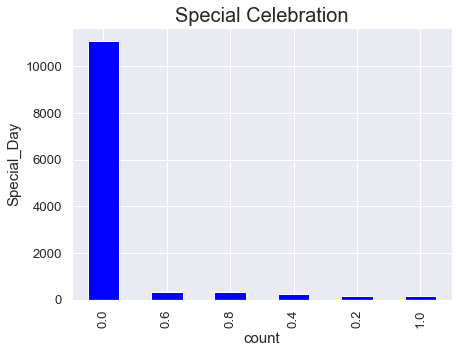

In [78]:
#using bar chart to visualize the browser count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
jumia_df['SpecialDay'].value_counts().plot.bar('SpecialDay', color = 'blue')
plt.title('Special Celebration', fontsize = 20)
plt.xlabel('count', fontsize = 15)
plt.ylabel('Special_Day', fontsize = 15)

In [23]:
#check values in Month column with value_counts()
m = jumia_df['Month'].value_counts().sort_values(ascending=True)
m

Feb      184
June     288
Jul      432
Aug      433
Sep      448
Oct      549
Dec     1727
Mar     1907
Nov     2998
May     3364
Name: Month, dtype: int64

Text(0, 0.5, 'count')

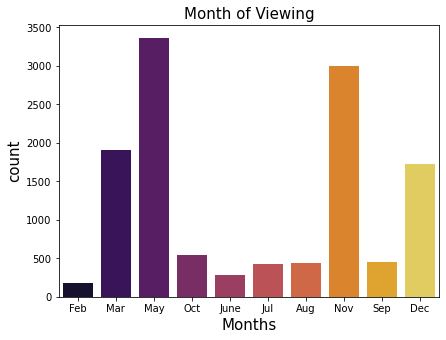

In [21]:
#using bar chart to visualize the month count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
sns.countplot(x = jumia_df['Month'], palette = 'inferno')
plt.title('Month of Viewing', fontsize = 15)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In [29]:
jumia_df['Month'].value_counts(normalize=True)

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

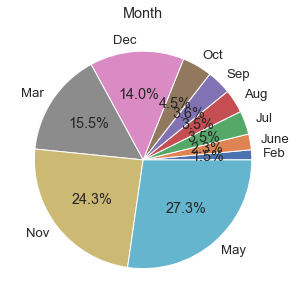

In [27]:
#using pie chart to visualize the month count

sns.set_theme(font_scale=1.2)

plt.figure(figsize=(5,5))
plt.pie(m,labels=m.index, autopct="%.1f%%")

plt.title('Month',
             loc ='center', )
plt.show()

In [35]:
#check values in Operating Systems column using value counts

os = jumia_df['OperatingSystems'].value_counts().sort_values(ascending=True)
os

5       6
7       7
6      19
8      79
4     478
3    2555
1    2585
2    6601
Name: OperatingSystems, dtype: int64

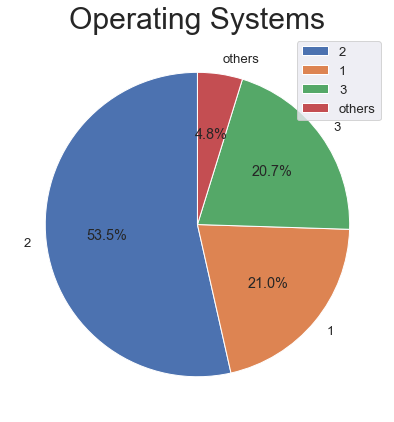

In [45]:
#using pie chart to visualize the operating Systems count
size = [6601, 2585, 2555, 589]
sns.set_theme(font_scale=1.2)
labels='2', '1', '3', 'others'

plt.figure(figsize=(18,7))
plt.pie(size,labels=labels, autopct="%.1f%%", startangle=90)

plt.title('Operating Systems',
             loc ='center', fontsize = 30)
plt.legend()
plt.show()

In [57]:
#check values in Browser column using value counts

jumia_df['Browser'].value_counts().sort_values(ascending=True)

9        1
11       6
12      10
7       49
13      61
3      105
8      135
10     163
6      174
5      467
4      736
1     2462
2     7961
Name: Browser, dtype: int64

Text(0, 0.5, 'Browser Type')

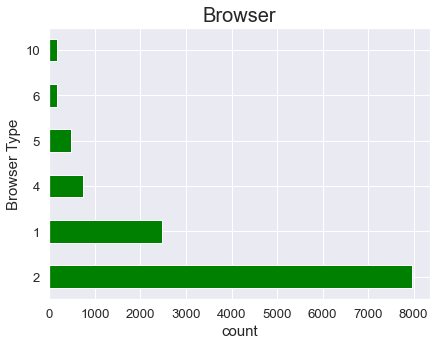

In [71]:
#using bar chart to visualize the browser count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
jumia_df['Browser'].value_counts().head(6).plot.barh('Browser', color = 'green')
plt.title('Browser', fontsize = 20)
plt.xlabel('count', fontsize = 15)
plt.ylabel('Browser Type', fontsize = 15)

In [47]:
jumia_df['Browser'].value_counts(normalize=True)

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64

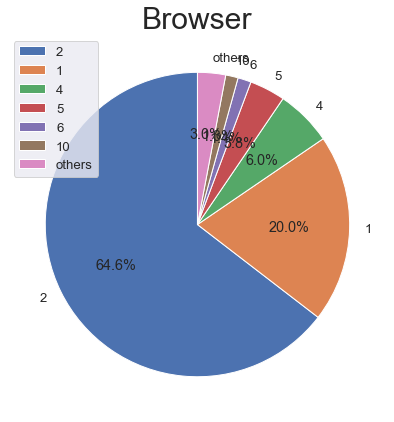

In [56]:
#using pie chart to visualize the Browser count
size = [7961, 2462, 736, 467, 174, 163, 367]
sns.set_theme(font_scale=1.2)
labels='2', '1', '4', '5', '6', '10', 'others'

plt.figure(figsize=(18,7))
plt.pie(size,labels=labels, autopct="%.1f%%", startangle=90)

plt.title('Browser',
             loc ='center', fontsize = 30)
plt.legend()
plt.show()

In [58]:
#check values in Region column using value counts

jumia_df['Region'].value_counts().sort_values(ascending=True)

5     318
8     434
9     511
7     761
6     805
2    1136
4    1182
3    2403
1    4780
Name: Region, dtype: int64

Text(0, 0.5, 'Regional Code')

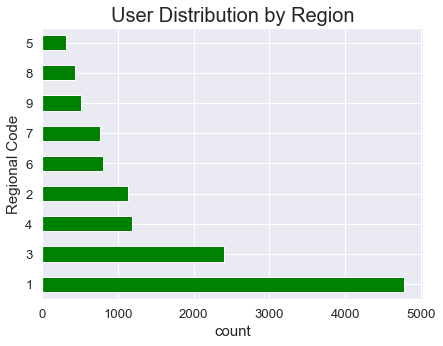

In [75]:
#using bar chart to visualize the regional count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
jumia_df['Region'].value_counts().plot.barh('Browser', color = 'green')
plt.title('User Distribution by Region', fontsize = 20)
plt.xlabel('count', fontsize = 15)
plt.ylabel('Regional Code', fontsize = 15)

In [127]:
#check values in Traffic Type column using value counts

tt = jumia_df['TrafficType'].value_counts().sort_values(ascending=True)
tt

17       1
12       1
16       3
18      10
14      13
19      17
15      38
7       40
9       42
20     198
11     247
5      260
8      343
6      444
10     450
13     738
4     1069
3     2052
1     2451
2     3913
Name: TrafficType, dtype: int64

Text(0, 0.5, 'Type_of_Traffic')

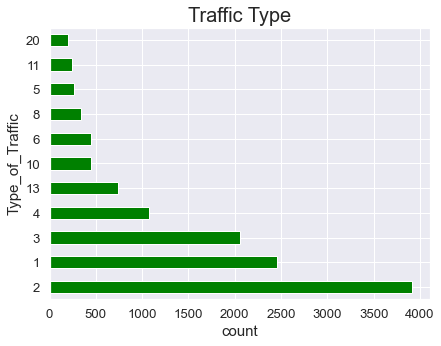

In [72]:
#using bar chart to visualize the traffic type count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
jumia_df['TrafficType'].value_counts().head(11).plot.barh('Browser', color = 'green')
plt.title('Traffic Type', fontsize = 20)
plt.xlabel('count', fontsize = 15)
plt.ylabel('Type_of_Traffic', fontsize = 15)

In [66]:
#check values in Visitor Type column using value counts

vt = jumia_df['VisitorType'].value_counts().sort_values(ascending=True)
vt

Other                   85
New_Visitor           1694
Returning_Visitor    10551
Name: VisitorType, dtype: int64

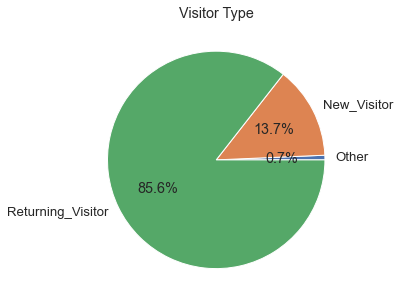

In [70]:
#using pie chart to visualize the visitors type count

sns.set_theme(font_scale=1.2)

plt.figure(figsize=(5,5))
plt.pie(vt,labels=vt.index, autopct="%.1f%%")

plt.title('Visitor Type',
             loc ='center', )
plt.show()

In [126]:
#check values in Weekend column using value counts

w = jumia_df['Weekend'].value_counts().sort_values(ascending=True)
w

True     2868
False    9462
Name: Weekend, dtype: int64

Text(0, 0.5, 'count')

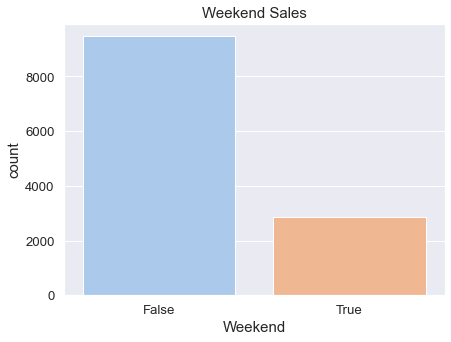

In [64]:
#using bar chart to visualize the weekend count

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
sns.countplot(x = jumia_df['Weekend'], palette = 'pastel')
plt.title('Weekend Sales', fontsize = 15)
plt.xlabel('Weekend', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In [62]:
#check values in Revenue column using value counts

jumia_df['Revenue'].value_counts().sort_values(ascending=True)

True      1908
False    10422
Name: Revenue, dtype: int64

Text(0, 0.5, 'count')

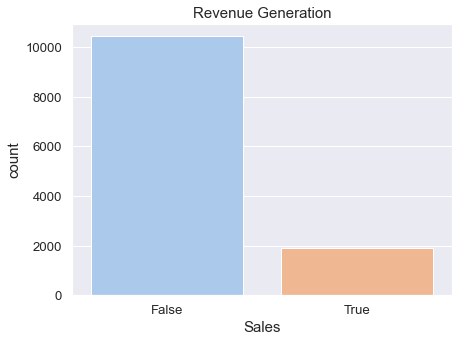

In [63]:
#using bar chart to visualize the revenue count whether the visit generates sales

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1,2,1)
sns.countplot(x = jumia_df['Revenue'], palette = 'pastel')
plt.title('Revenue Generation', fontsize = 15)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('count', fontsize = 15)

## Bivariate Analysis

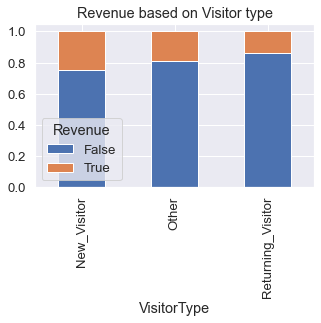

In [164]:
#using bar chart to visualize the type of visitor with revenues generated

df = pd.crosstab(jumia_df['VisitorType'], jumia_df['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True', figsize = (5,3))

plt.title('Revenue based on Visitor type')
plt.show()

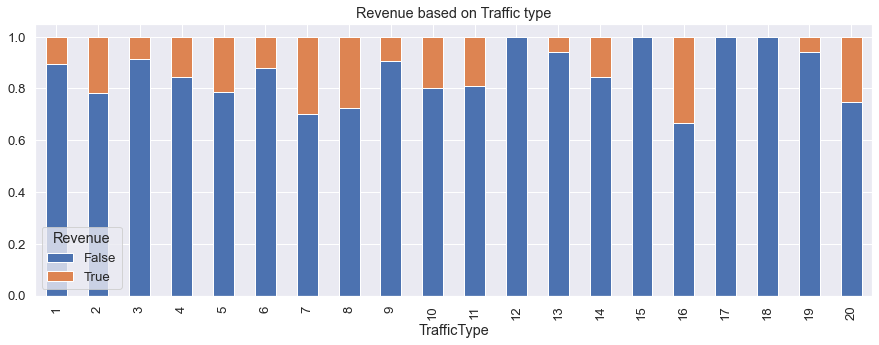

In [168]:
#using bar chart to visualize the traffic with revenues generated

df = pd.crosstab(jumia_df['TrafficType'], jumia_df['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True', figsize = (15,5))

plt.title('Revenue based on Traffic type')
plt.show()

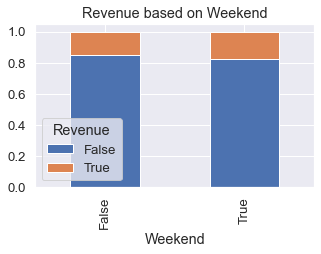

In [171]:
#using bar chart to visualize the revenues generated based on weekend

df = pd.crosstab(jumia_df['Weekend'], jumia_df['Revenue'])
df.div(df.sum(1), axis=0).plot(kind = 'bar', stacked = 'True', figsize = (5,3))

plt.title('Revenue based on Weekend')
plt.show()

In [176]:
jumia_df['PageValues'].value_counts().sort_values(ascending=True)

60.628850       1
11.995540       1
18.368049       1
38.990000       1
8.772473        1
             ... 
40.278152       2
78.569599       2
42.293068       3
53.988000       6
0.000000     9600
Name: PageValues, Length: 2704, dtype: int64

Text(0.5, 1.0, "A plot of 'Page Value' vs 'Revenue'")

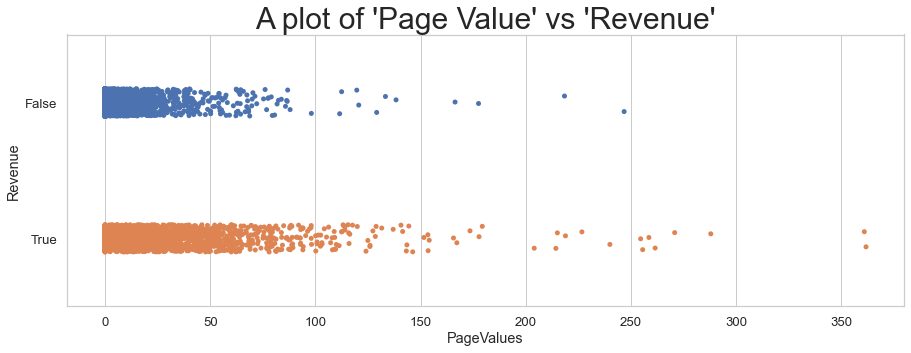

In [182]:
#Stripplot for PageValues vs Revenue
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.PageValues, y=jumia_df.Revenue, orient = 'h')

plt.title("A plot of 'Page Value' vs 'Revenue'", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Exit Rates' vs 'Revenue'")

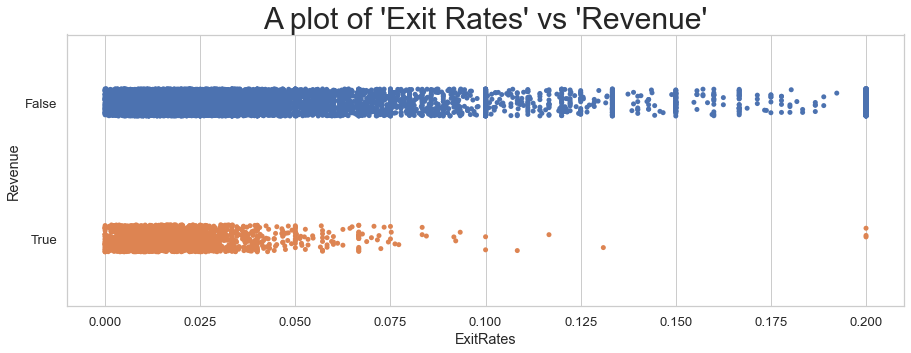

In [183]:
#Stripplot for Exit rates vs Revenue
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.ExitRates, y=jumia_df.Revenue, orient = 'h')

plt.title("A plot of 'Exit Rates' vs 'Revenue'", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Product Related Duration' vs 'Revenue'")

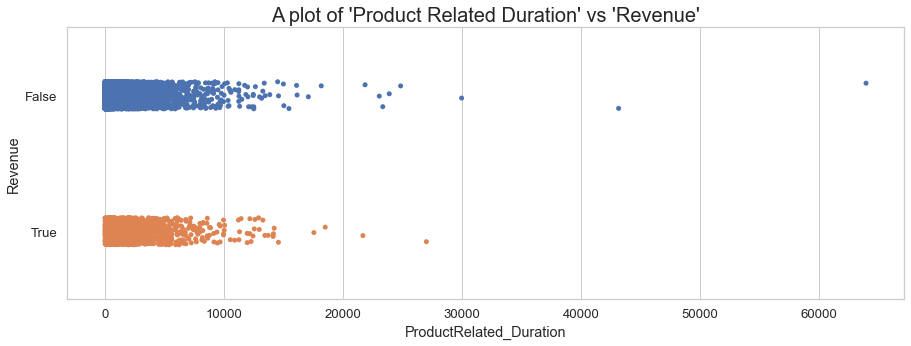

In [186]:
#Stripplot for Product related duration vs Revenue
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.ProductRelated_Duration, y=jumia_df.Revenue, orient = 'h')

plt.title("A plot of 'Product Related Duration' vs 'Revenue'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Bounce Rates' vs 'Revenue'")

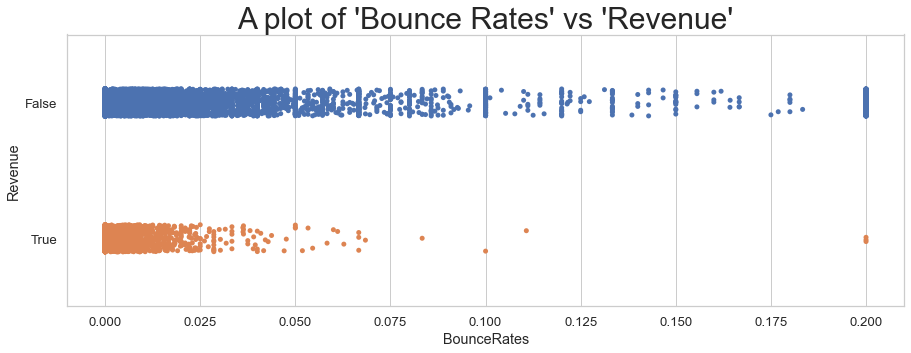

In [187]:
#Stripplot for Bounce Rates vs Revenue
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.BounceRates, y=jumia_df.Revenue, orient = 'h')

plt.title("A plot of 'Bounce Rates' vs 'Revenue'", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Bounce Rates'")

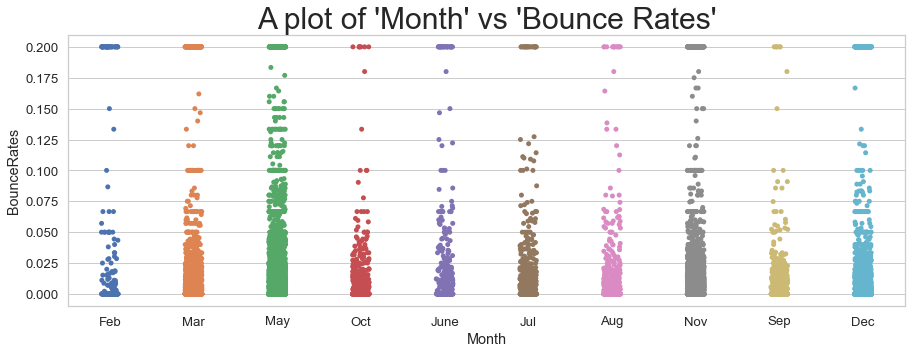

In [189]:
#Stripplot for Month vs Bounce Rates
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.Month, y=jumia_df.BounceRates)

plt.title("A plot of 'Month' vs 'Bounce Rates'", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Exit Rates'")

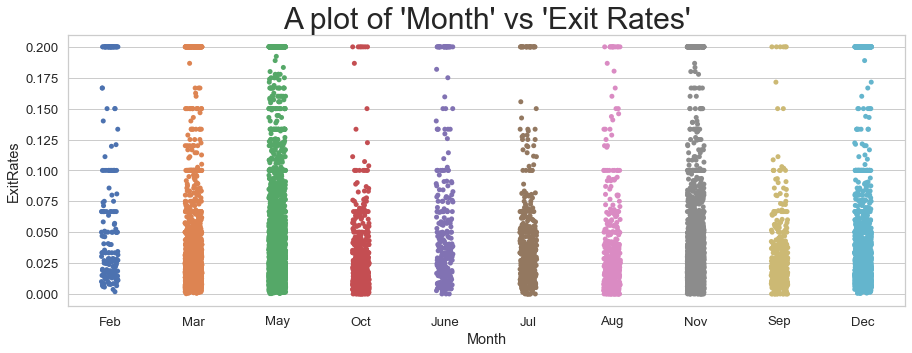

In [190]:
#Stripplot for Month vs Exit Rates
sns.set_style('whitegrid')
sns.stripplot(x=jumia_df.Month, y=jumia_df.ExitRates)

plt.title("A plot of 'Month' vs 'Exit Rates'", fontsize = 30,
             loc ='center', )

## Multivariate Analysis

Text(0.5, 1.0, "A plot of 'Visitor Type' vs 'Exit Rates' wrt Revenue")

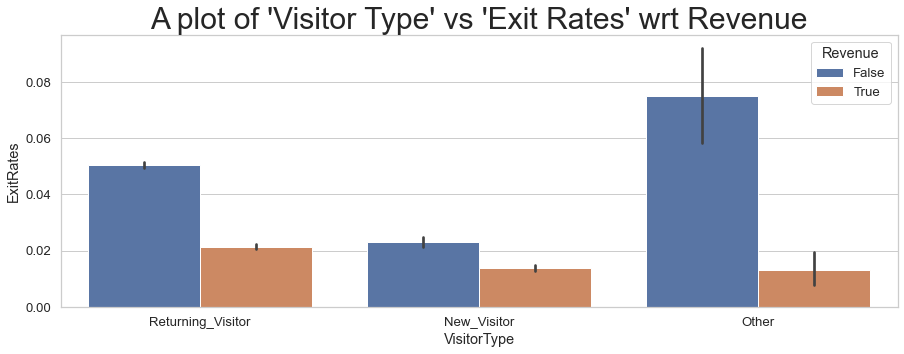

In [272]:
sns.barplot(
    x='VisitorType', 
    y='ExitRates', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Visitor Type' vs 'Exit Rates' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Visitor Type' vs 'Bounce Rates' wrt Revenue")

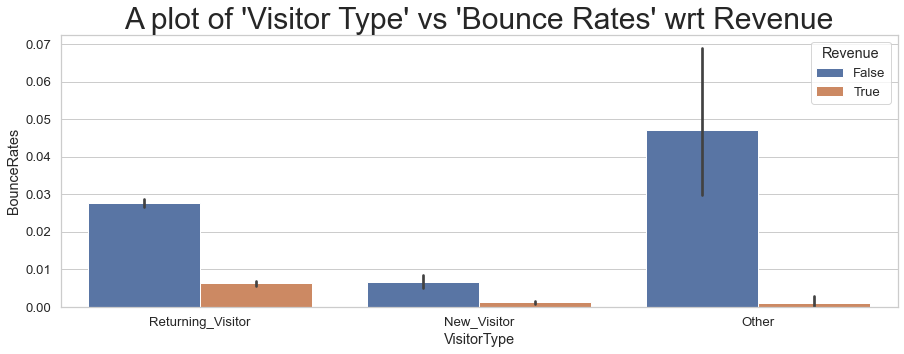

In [192]:
sns.barplot(
    x='VisitorType', 
    y='BounceRates', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Visitor Type' vs 'Bounce Rates' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Exit Rates' wrt Revenue")

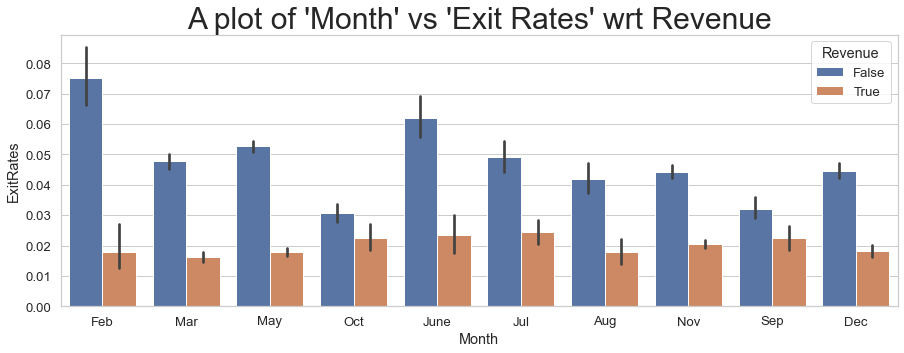

In [193]:
sns.barplot(
    x='Month', 
    y='ExitRates', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Month' vs 'Exit Rates' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Bounce Rates' wrt Revenue")

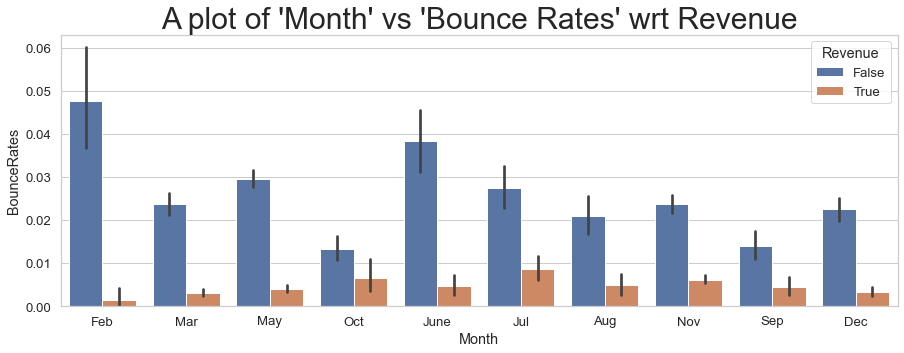

In [194]:
sns.barplot(
    x='Month', 
    y='BounceRates', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Month' vs 'Bounce Rates' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Page Values' wrt Revenue")

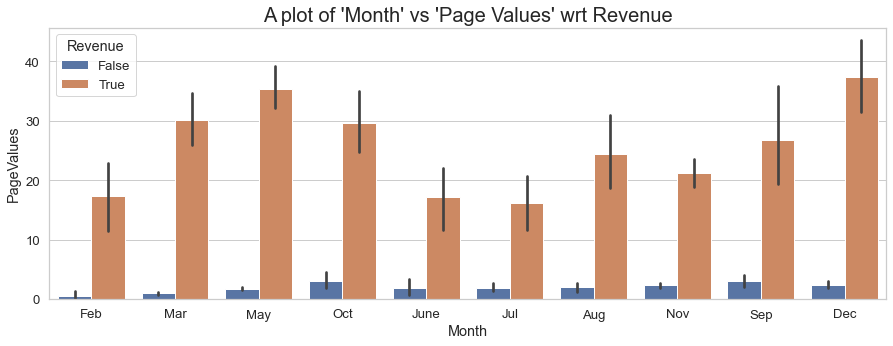

In [202]:
sns.barplot(
    y='PageValues', 
    x='Month', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Month' vs 'Page Values' wrt Revenue", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Visitor Type' vs 'Page Values' wrt Revenue")

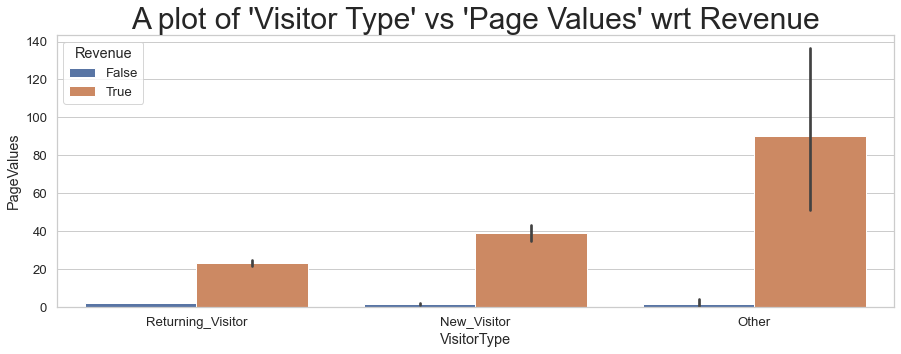

In [273]:
sns.barplot(
    y='PageValues', 
    x='VisitorType', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Visitor Type' vs 'Page Values' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Region' vs 'Page Values' wrt Revenue")

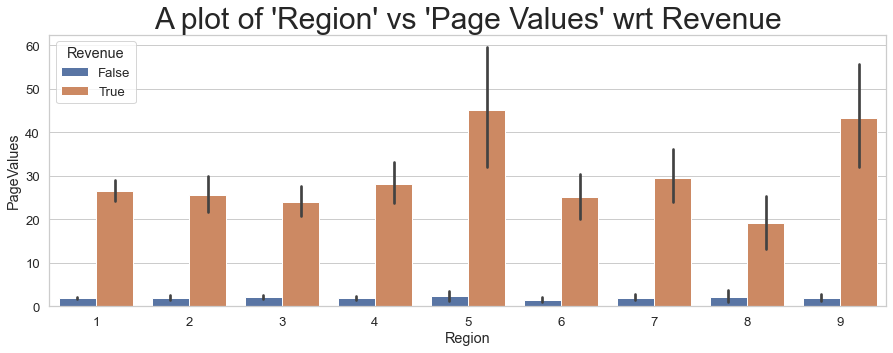

In [207]:

sns.barplot(
    y='PageValues', 
    x='Region', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Region' vs 'Page Values' wrt Revenue", fontsize = 30,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Visitor Type' vs 'Weekend' wrt Revenue")

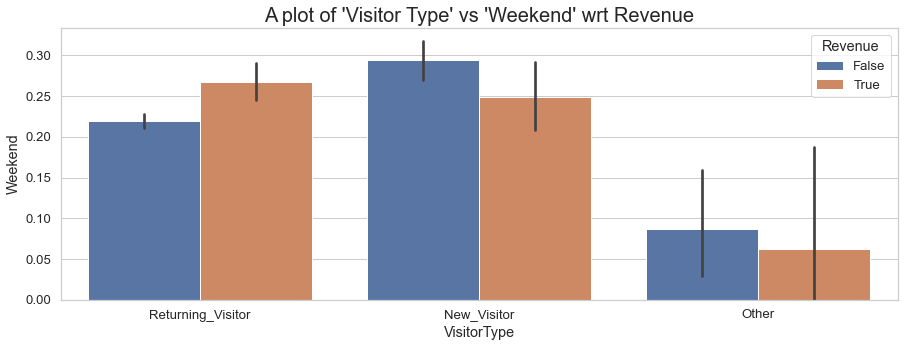

In [210]:
sns.barplot(
    y='Weekend', 
    x='VisitorType', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Visitor Type' vs 'Weekend' wrt Revenue", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Month' vs 'Weekend' wrt Revenue")

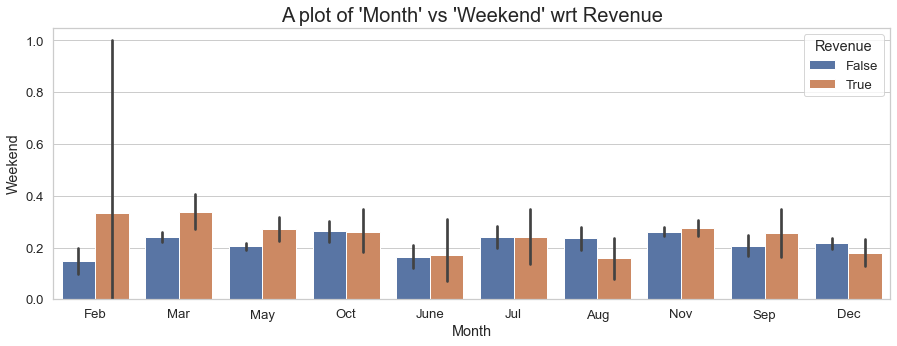

In [212]:
sns.barplot(
    x='Month', 
    y='Weekend', 
    data=jumia_df, 
    hue='Revenue')
plt.title("A plot of 'Month' vs 'Weekend' wrt Revenue", fontsize = 20,
             loc ='center', )

## Feature Engineering

In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that your machine learning algorithms can work better with.

### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

In [213]:
#select categorical variables

categorical = ["VisitorType","Month"]

In [214]:
#use pd.get_dummies() for one hot encoding

categories_dummies = pd.get_dummies(jumia_df[categorical])

#view what you have done
categories_dummies.head()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0


In [215]:
#join the encoded variables back to the main dataframe using pd.concat()

jumia_df = pd.concat([jumia_df,categories_dummies] ,axis=1)

print(jumia_df.shape)
jumia_df.head()

(12330, 31)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [216]:
#remove the initial categorical columns now that it has been encoded
#use the list called categorical do delete all the initially selected columns at once

jumia_df = jumia_df.drop(categorical,axis=1)

In [217]:
print(jumia_df.shape)
jumia_df.head()

(12330, 29)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [218]:
#splitting the dataset

y=jumia_df.Revenue
X=jumia_df.drop("Revenue", axis=1)

print(X.shape)
print(y.shape)

(12330, 28)
(12330,)


### Preparing the models

In [236]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [229]:
#split into training and validation sets using a 30% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [234]:
# TODO: initialize logistic regression
LR = LogisticRegression(random_state=42)

In [108]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [109]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier(random_state=42)


In [110]:
#TODO: initialize random forest
RF = RandomForestClassifier(random_state=42)

In [237]:
#TODO: initialize support vector machine
SVM = svm.SVC()

In [238]:
#create list of your model names
models = [LR,KN, DC, RF, SVM]

In [243]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid))
    

In [244]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)
    


For LogisticRegression, Accuracy score is 0.8802379021357124 

              precision    recall  f1-score   support

       False       0.97      0.89      0.93      3410
        True       0.36      0.71      0.48       289

    accuracy                           0.88      3699
   macro avg       0.67      0.80      0.71      3699
weighted avg       0.93      0.88      0.90      3699


For KNeighborsClassifier, Accuracy score is 0.8656393619897269 

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      3408
        True       0.32      0.62      0.42       291

    accuracy                           0.87      3699
   macro avg       0.64      0.75      0.67      3699
weighted avg       0.91      0.87      0.88      3699


For DecisionTreeClassifier, Accuracy score is 0.862124898621249 

              precision    recall  f1-score   support

       False       0.91      0.92      0.92      3101
        True       0.58      0.55      0

In [260]:
#predict and store your predictions to a variable
#in order of decreasing accuracy
#RF, LR, KN, DT, SVM
RF_preds = RF.predict(X_valid)
LR_preds = LR.predict(X_valid)
KN_preds = KN.predict(X_valid)
DC_preds = DC.predict(X_valid)
SVM_preds = SVM.predict(X_valid)

### Inspect Feature Importances

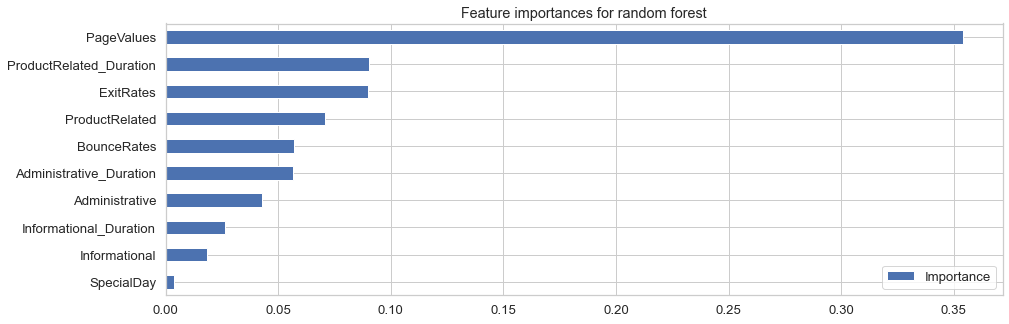

In [245]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [246]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'Administrative', 'Administrative_Duration', 'BounceRates',
       'ProductRelated', 'ExitRates', 'ProductRelated_Duration',
       'PageValues'], dtype=object)

## Confusion Matrix

To visualize and summarize the performance of a classification algorithm.
There are four categories in a confusion matrix:

- True Positive: i.e. predict 1; got 1
- False Positive: i.e. predict 0; got 1
- True Negative: i.e. predict 0; got 0
- False Negative: i.e. predict 1; got 0


## 
Confusion Matrix in order of increasing accuracy

- Random Forest Classifier; Accuracy score is 0.9040281157069479 
- Logistic Regression; Accuracy score is 0.8802379021357124 
- K Nearest Neighbors Classifier; Accuracy score is 0.8656393619897269 
- Decision Tree Classifier; Accuracy score is 0.862124898621249 
- Support Vector Machines - SVC; Accuracy score is 0.8499594484995945 

In [261]:
from sklearn.metrics import confusion_matrix

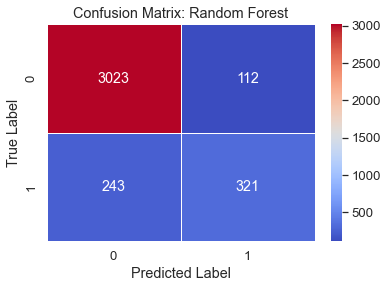

In [266]:
cm = confusion_matrix(y_valid, RF_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

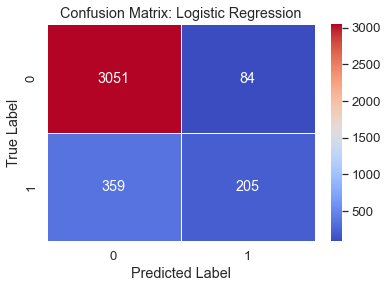

In [267]:
cm = confusion_matrix(y_valid, LR_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

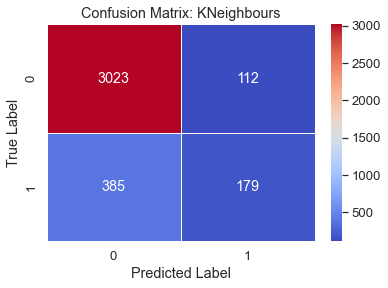

In [268]:
cm = confusion_matrix(y_valid, KN_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KNeighbours')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

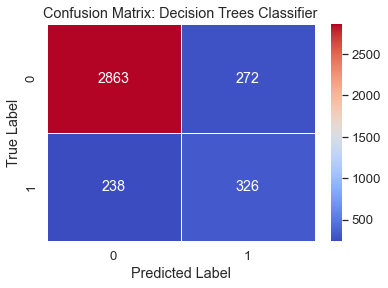

In [269]:
cm = confusion_matrix(y_valid, DC_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Decision Trees Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

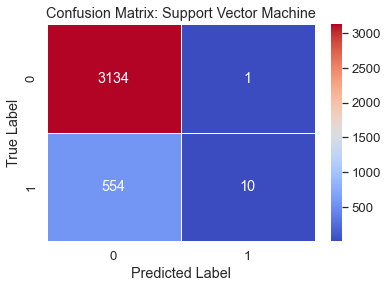

In [270]:
cm = confusion_matrix(y_valid, SVM_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Support Vector Machine')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()